In [1]:
# import os
# import sys
# sys.path.insert(0, os.path.abspath('../my_modules'))

# print(sys.path)

import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats

import etroc0_benchtest

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



npoints is 2000
events_t is 1000


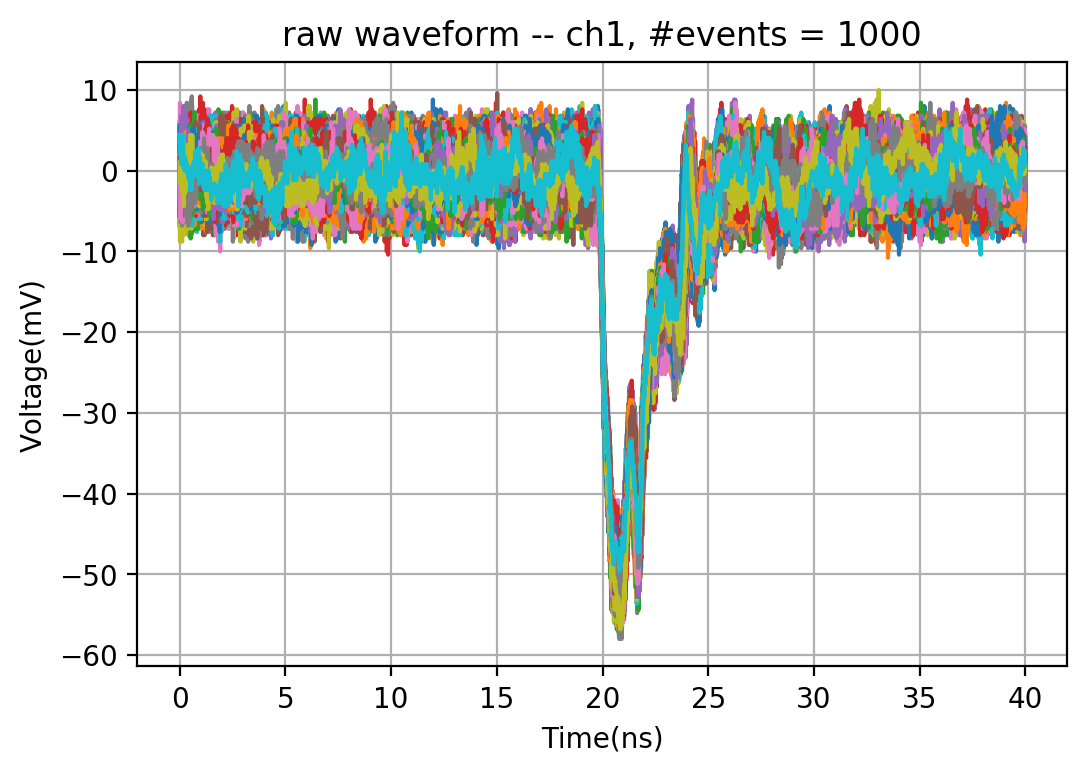

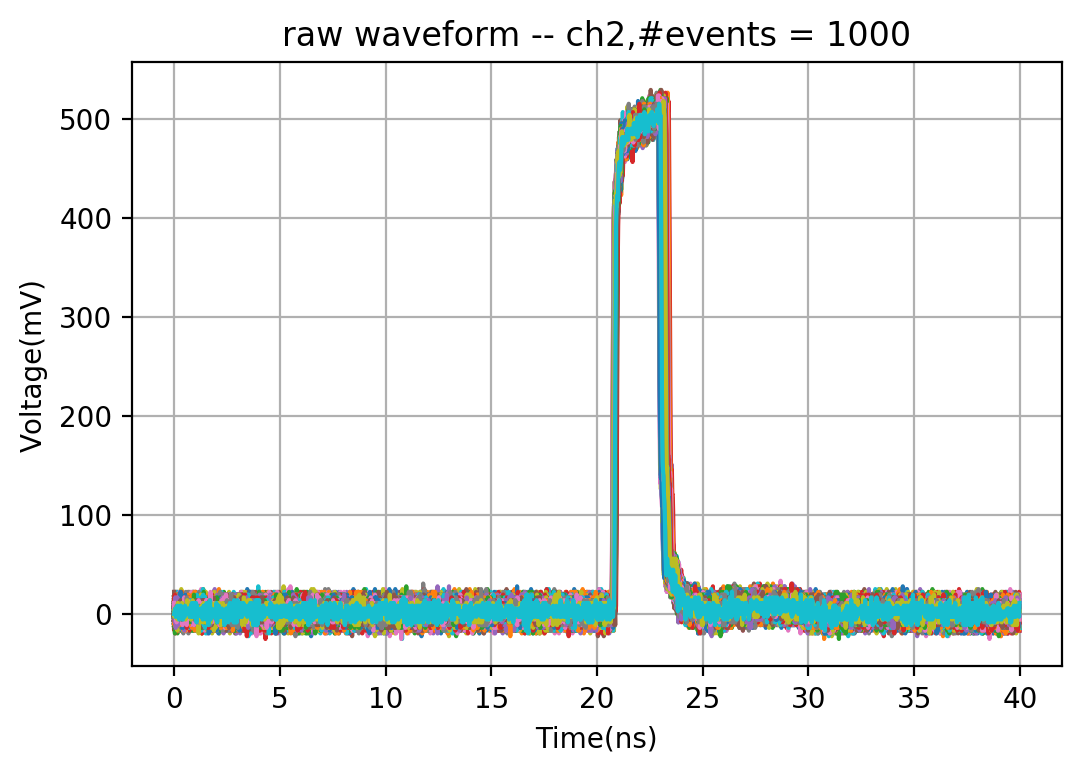

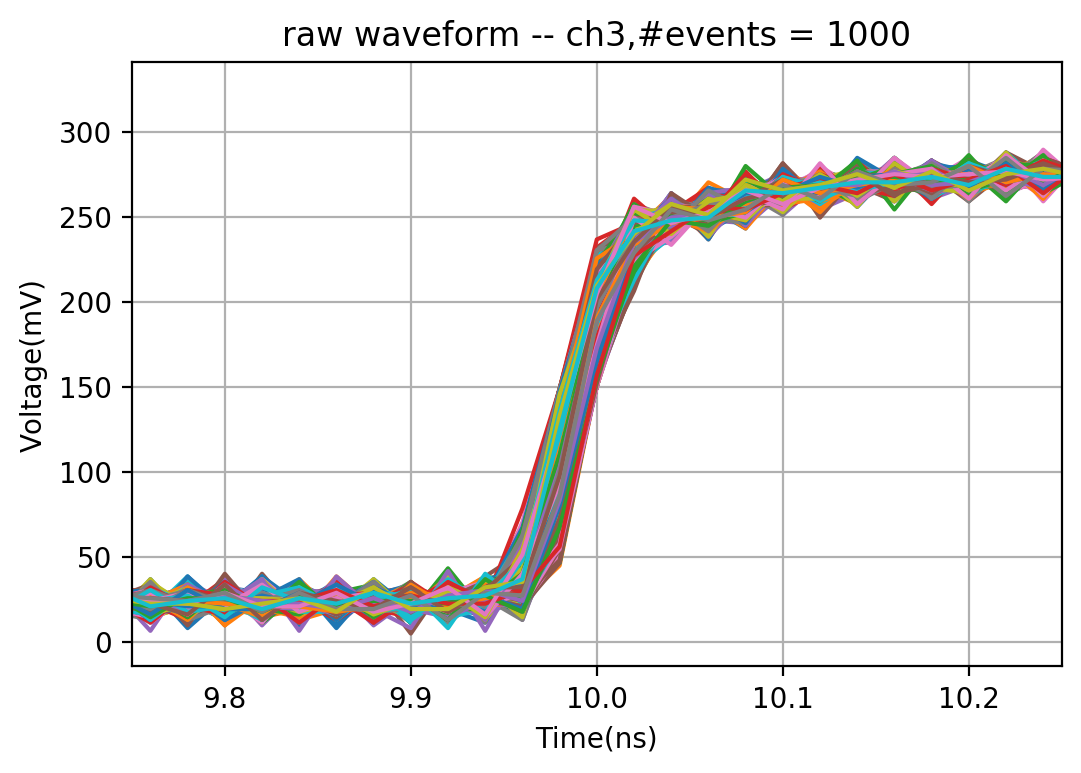

In [6]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- high power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'Discriminator_DGHP/3fC/DGHP_DAC322_3fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'



################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
# events_t = events_t - 990


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
# ax2.set_xlim(left=15,right=20)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [4]:
########################################## DAC 322 #################################
filelist = [
    'Discriminator_DGHP/3fC/DGHP_DAC322_3fC_0.hdf5',
    'Discriminator_DGHP/4fC/DGHP_DAC322_4fC_0.hdf5',
    'Discriminator_DGHP/5fC/DGHP_DAC322_5fC_0.hdf5',
    'Discriminator_DGHP/6fC/DGHP_DAC322_6fC_0.hdf5',
    'Discriminator_DGHP/8fC/DGHP_DAC322_8fC_0.hdf5',
    'Discriminator_DGHP/10fC/DGHP_DAC322_10fC_0.hdf5',
    'Discriminator_DGHP/12fC/DGHP_DAC322_12fC_0.hdf5',
    'Discriminator_DGHP/15fC/DGHP_DAC322_15fC_0.hdf5',
    'Discriminator_DGHP/20fC/DGHP_DAC322_20fC_0.hdf5',
    'Discriminator_DGHP/30fC/DGHP_DAC322_30fC_0.hdf5'
]

charge_DAC322_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC322_list = []
mean_t_trigger_DAC322_list = []
std_t_trigger_DAC322_list = []
t_pa_DAC322_list = []
mean_t_pa_DAC322_list = []
std_t_pa_DAC322_list = []
t_discri_le_DAC322_list = []
mean_t_discri_le_DAC322_list = []
std_t_discri_le_DAC322_list = []
t_discri_te_DAC322_list = []
mean_t_discri_te_DAC322_list = []
std_t_discri_te_DAC322_list = []
t_discri_le_notrig_DAC322_list = []
mean_t_discri_le_notrig_DAC322_list = []
std_t_discri_le_notrig_DAC322_list = []
t_discri_te_notrig_DAC322_list = []
mean_t_discri_te_notrig_DAC322_list = []
std_t_discri_te_notrig_DAC322_list = []
ampl_ch1_DAC322_list = []
mean_ampl_DAC322_list = []
std_ampl_DAC322_list = []
q_ch1_DAC322_list = []
mean_q_DAC322_list = []
std_q_DAC322_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC322_list.append(t_trigger)
    mean_t_trigger_DAC322_list.append(mean_t_trigger)
    std_t_trigger_DAC322_list.append(std_t_trigger*1000)
    t_pa_DAC322_list.append(t_pa)
    mean_t_pa_DAC322_list.append(mean_t_pa)
    std_t_pa_DAC322_list.append(std_t_pa*1000)
    t_discri_le_DAC322_list.append(t_discri_le)
    mean_t_discri_le_DAC322_list.append(mean_t_discri_le)
    std_t_discri_le_DAC322_list.append(std_t_discri_le*1000)
    t_discri_te_DAC322_list.append(t_discri_te)
    mean_t_discri_te_DAC322_list.append(mean_t_discri_te)
    std_t_discri_te_DAC322_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC322_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC322_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC322_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC322_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC322_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC322_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC322_list.append(ampl_ch1)
    mean_ampl_DAC322_list.append(mean_ampl)
    std_ampl_DAC322_list.append(std_ampl)
    q_ch1_DAC322_list.append(q_ch1)
    mean_q_DAC322_list.append(mean_q)
    std_q_DAC322_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC322_list is\n',std_t_pa_DAC322_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC322_list is\n',std_t_discri_le_notrig_DAC322_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC322_list is\n', std_t_discri_te_notrig_DAC322_list)
print('*****************************************************************************************')
print('mean_ampl_DAC322_list is\n', mean_ampl_DAC322_list)
print('*****************************************************************************************')
print('mean_q_DAC322_list is\n', mean_q_DAC322_list)

file_num is 10



npoints at DAC322 / DGHP/3fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.1552
trigger crossing searching is done
trigger mean is 9.994035000000004 ns
trigger std is 0.0059239999155975345 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.12830499999995 ns
PA std is 0.03281770825331882 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.851754999999983 ns
discriminator leading std is 0.0332504883422779 ns
discriminator trailing mean is 23.160710000000144 ns
discriminator trailing std is 0.0800274696588598 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.85771999999998 ns
discriminator t_le std (trigger removed) is 0.032629765552329076 ns
discriminator t_te mean (trigg


npoints at DAC322 / DGHP/4fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.199
trigger crossing searching is done
trigger mean is 9.992195000000004 ns
trigger std is 0.005692712446628615 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.042719999999957 ns
PA std is 0.014519008230591674 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.682264999999983 ns
discriminator leading std is 0.022997712386234763 ns
discriminator trailing mean is 23.729560000000134 ns
discriminator trailing std is 0.11289422660171536 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.69006999999998 ns
discriminator t_le std (trigger removed) is 0.02253541878909679 ns
discriminator t_te mean (tri


npoints at DAC322 / DGHP/5fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997
trigger crossing searching is done
trigger mean is 9.992650000000003 ns
trigger std is 0.005369124695888572 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.004444999999954 ns
PA std is 0.01137396039205311 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.59042499999999 ns
discriminator leading std is 0.017708596076481804 ns
discriminator trailing mean is 24.155085000000124 ns
discriminator trailing std is 0.09076159857009816 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.597774999999984 ns
discriminator t_le std (trigger removed) is 0.016772727118748117 ns
discriminator 


npoints at DAC322 / DGHP/6fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.312
trigger crossing searching is done
trigger mean is 9.993520000000002 ns
trigger std is 0.006046453505981817 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.982554999999955 ns
PA std is 0.01045930088485811 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.53089999999999 ns
discriminator leading std is 0.016009059934923957 ns
discriminator trailing mean is 24.439645000000116 ns
discriminator trailing std is 0.09108319809382874 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.537379999999986 ns
discriminator t_le std (trigger removed) is 0.01484033692339865 ns
discriminator t_te mean (trig


npoints at DAC322 / DGHP/8fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.406
trigger crossing searching is done
trigger mean is 9.992810000000004 ns
trigger std is 0.0057099824868383385 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.953644999999955 ns
PA std is 0.009723115498645232 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.463604999999987 ns
discriminator leading std is 0.01263443607764085 ns
discriminator trailing mean is 24.83452500000011 ns
discriminator trailing std is 0.08290626861100256 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.470794999999987 ns
discriminator t_le std (trigger removed) is 0.011377300866198186 ns
discriminator t_te mean (tr


npoints at DAC322 / DGHP/10fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.505
trigger crossing searching is done
trigger mean is 9.992525000000002 ns
trigger std is 0.0054588803797116295 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.936499999999956 ns
PA std is 0.01022741414043612 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.419814999999996 ns
discriminator leading std is 0.011394769633476343 ns
discriminator trailing mean is 25.074120000000104 ns
discriminator trailing std is 0.07305392255039955 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.42728999999999 ns
discriminator t_le std (trigger removed) is 0.010281337461633852 ns
discriminator t_te mean (t


npoints at DAC322 / DGHP/12fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.606
trigger crossing searching is done
trigger mean is 9.992890000000003 ns
trigger std is 0.0054678972192242666 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.92419999999996 ns
PA std is 0.009636389365316994 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.394104999999993 ns
discriminator leading std is 0.010877682427796652 ns
discriminator trailing mean is 25.2381400000001 ns
discriminator trailing std is 0.06539182211867026 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.40121499999999 ns
discriminator t_le std (trigger removed) is 0.009364762410226804 ns
discriminator t_te mean (tri


npoints at DAC322 / DGHP/15fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.756
trigger crossing searching is done
trigger mean is 9.993340000000002 ns
trigger std is 0.0056607773317805515 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.90959499999996 ns
PA std is 0.010724316994568606 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.367834999999996 ns
discriminator leading std is 0.010150752435164397 ns
discriminator trailing mean is 25.389020000000098 ns
discriminator trailing std is 0.057890755738717506 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.374494999999992 ns
discriminator t_le std (trigger removed) is 0.00827767932454485 ns
discriminator t_te mean (


npoints at DAC322 / DGHP/20fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.9199999999999999
trigger crossing searching is done
trigger mean is 9.989475000000002 ns
trigger std is 0.006248949911785013 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.89961999999996 ns
PA std is 0.01094100543825804 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.337594999999993 ns
discriminator leading std is 0.009504786951846726 ns
discriminator trailing mean is 25.501930000000094 ns
discriminator trailing std is 0.05818354664335831 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.34811999999999 ns
discriminator t_le std (trigger removed) is 0.00787499841269806 ns
discriminator t_


npoints at DAC322 / DGHP/30fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.43
trigger crossing searching is done
trigger mean is 9.993220000000003 ns
trigger std is 0.0058293738943389125 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.93961499999996 ns
PA std is 0.5240145291640186 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.604489999999984 ns
discriminator leading std is 0.009213571511634076 ns
discriminator trailing mean is 25.964115000000085 ns
discriminator trailing std is 0.047981160625811266 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.611269999999985 ns
discriminator t_le std (trigger removed) is 0.007279223859725513 ns
discriminator t_te mean (tr

In [ ]:
########################################## DAC 326 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC222_3fC_0.hdf5',
    'DGHP/4fC/DGDP_DAC222_4fC_0.hdf5',
    'DGHP/5fC/DGDP_DAC222_5fC_0.hdf5',
    'DGHP/6fC/DGDP_DAC222_6fC_0.hdf5',
    'DGHP/8fC/DGDP_DAC222_8fC_0.hdf5',
    'DGHP/10fC/DGDP_DAC222_10fC_0.hdf5',
    'DGHP/12fC/DGDP_DAC222_12fC_0.hdf5',
    'DGHP/15fC/DGDP_DAC222_15fC_0.hdf5',
    'DGHP/20fC/DGDP_DAC222_20fC_0.hdf5',
    'DGHP/30fC/DGDP_DAC222_30fC_0.hdf5'
]

charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC222_list = []
mean_t_trigger_DAC222_list = []
std_t_trigger_DAC222_list = []
t_pa_DAC222_list = []
mean_t_pa_DAC222_list = []
std_t_pa_DAC222_list = []
t_discri_le_DAC222_list = []
mean_t_discri_le_DAC222_list = []
std_t_discri_le_DAC222_list = []
t_discri_te_DAC222_list = []
mean_t_discri_te_DAC222_list = []
std_t_discri_te_DAC222_list = []
t_discri_le_notrig_DAC222_list = []
mean_t_discri_le_notrig_DAC222_list = []
std_t_discri_le_notrig_DAC222_list = []
t_discri_te_notrig_DAC222_list = []
mean_t_discri_te_notrig_DAC222_list = []
std_t_discri_te_notrig_DAC222_list = []
ampl_ch1_DAC222_list = []
mean_ampl_DAC222_list = []
std_ampl_DAC222_list = []
q_ch1_DAC222_list = []
mean_q_DAC222_list = []
std_q_DAC222_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC222_list.append(t_trigger)
    mean_t_trigger_DAC222_list.append(mean_t_trigger)
    std_t_trigger_DAC222_list.append(std_t_trigger*1000)
    t_pa_DAC222_list.append(t_pa)
    mean_t_pa_DAC222_list.append(mean_t_pa)
    std_t_pa_DAC222_list.append(std_t_pa*1000)
    t_discri_le_DAC222_list.append(t_discri_le)
    mean_t_discri_le_DAC222_list.append(mean_t_discri_le)
    std_t_discri_le_DAC222_list.append(std_t_discri_le*1000)
    t_discri_te_DAC222_list.append(t_discri_te)
    mean_t_discri_te_DAC222_list.append(mean_t_discri_te)
    std_t_discri_te_DAC222_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC222_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC222_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC222_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC222_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC222_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC222_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC222_list.append(ampl_ch1)
    mean_ampl_DAC222_list.append(mean_ampl)
    std_ampl_DAC222_list.append(std_ampl)
    q_ch1_DAC222_list.append(q_ch1)
    mean_q_DAC222_list.append(mean_q)
    std_q_DAC222_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC222_list is\n',std_t_pa_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC222_list is\n',std_t_discri_le_notrig_DAC222_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC222_list is\n', std_t_discri_te_notrig_DAC222_list)
print('*****************************************************************************************')
print('mean_ampl_DAC222_list is\n', mean_ampl_DAC222_list)
print('*****************************************************************************************')
print('mean_q_DAC222_list is\n', mean_q_DAC222_list)

In [ ]:
########################################## DAC 232 #################################
filelist = [
#     'DGDP/3fC/DGDP_DAC228_3fC_0.hdf5',
#     'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5',
    'DGDP/5fC/DGDP_DAC228_5fC_0.hdf5',
    'DGDP/6fC/DGDP_DAC228_6fC_0.hdf5',
    'DGDP/8fC/DGDP_DAC228_8fC_0.hdf5',
    'DGDP/10fC/DGDP_DAC228_10fC_0.hdf5',
    'DGDP/12fC/DGDP_DAC228_12fC_0.hdf5',
    'DGDP/15fC/DGDP_DAC228_15fC_0.hdf5',
    'DGDP/20fC/DGDP_DAC228_20fC_0.hdf5',
    'DGDP/30fC/DGDP_DAC228_30fC_0.hdf5'
]

charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC228_5fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC228_6fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC228_list = []
mean_t_trigger_DAC228_list = []
std_t_trigger_DAC228_list = []
t_pa_DAC228_list = []
mean_t_pa_DAC228_list = []
std_t_pa_DAC228_list = []
t_discri_le_DAC228_list = []
mean_t_discri_le_DAC228_list = []
std_t_discri_le_DAC228_list = []
t_discri_te_DAC228_list = []
mean_t_discri_te_DAC228_list = []
std_t_discri_te_DAC228_list = []
t_discri_le_notrig_DAC228_list = []
mean_t_discri_le_notrig_DAC228_list = []
std_t_discri_le_notrig_DAC228_list = []
t_discri_te_notrig_DAC228_list = []
mean_t_discri_te_notrig_DAC228_list = []
std_t_discri_te_notrig_DAC228_list = []
ampl_ch1_DAC228_list = []
mean_ampl_DAC228_list = []
std_ampl_DAC228_list = []
q_ch1_DAC228_list = []
mean_q_DAC228_list = []
std_q_DAC228_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=5e-3, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC228_list.append(t_trigger)
    mean_t_trigger_DAC228_list.append(mean_t_trigger)
    std_t_trigger_DAC228_list.append(std_t_trigger*1000)
    t_pa_DAC228_list.append(t_pa)
    mean_t_pa_DAC228_list.append(mean_t_pa)
    std_t_pa_DAC228_list.append(std_t_pa*1000)
    t_discri_le_DAC228_list.append(t_discri_le)
    mean_t_discri_le_DAC228_list.append(mean_t_discri_le)
    std_t_discri_le_DAC228_list.append(std_t_discri_le*1000)
    t_discri_te_DAC228_list.append(t_discri_te)
    mean_t_discri_te_DAC228_list.append(mean_t_discri_te)
    std_t_discri_te_DAC228_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC228_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC228_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC228_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC228_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC228_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC228_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC228_list.append(ampl_ch1)
    mean_ampl_DAC228_list.append(mean_ampl)
    std_ampl_DAC228_list.append(std_ampl)
    q_ch1_DAC228_list.append(q_ch1)
    mean_q_DAC228_list.append(mean_q)
    std_q_DAC228_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC228_list is\n',std_t_pa_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC228_list is\n',std_t_discri_le_notrig_DAC228_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC228_list is\n', std_t_discri_te_notrig_DAC228_list)
print('*****************************************************************************************')
print('mean_ampl_DAC228_list is\n', mean_ampl_DAC228_list)
print('*****************************************************************************************')
print('mean_q_DAC228_list is\n', mean_q_DAC228_list)

In [ ]:
############## plot  ###############
# charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC216_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC222_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC228_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]


fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC216_list, std_t_discri_le_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 LE")
ax1.plot(charge_DAC222_list, std_t_discri_le_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 LE")
ax1.plot(charge_DAC228_list, std_t_discri_le_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')


ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC216_list, std_t_discri_te_notrig_DAC216_list, 'o-', linewidth=2,  label="DAC216 TE")
ax2.plot(charge_DAC222_list, std_t_discri_te_notrig_DAC222_list, 'o-', linewidth=2,  label="DAC222 TE")
ax2.plot(charge_DAC228_list, std_t_discri_te_notrig_DAC228_list, 'o-', linewidth=2,  label="DAC228 TE")

ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()


print(std_q_DAC228_list)

In [ ]:
############################### plot to pdf  ######################################
path_plot = './'
pp = PdfPages(path_plot+"plots_DGHP"+".pdf")

charge_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

######### plot text box #####
fig0, ax0 = plt.subplots(dpi=200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
ax0.set_xlim(left=0,right=50)
ax0.set_ylim(bottom=0,top=50)
pp.savefig(fig0)
plt.close(fig0)

######### plot charge  ######
fig1, ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC228_list, mean_q_DAC228_list, 'o', label = 'DAC228 Charge')
ax1.set(xlabel='charge in(fC)', ylabel='charge measured(fC)',
       title='measured charge vs input charge')

# major_ticks_y = np.arange(0, 40, 5)
# minor_ticks_y = np.arange(0, 40, 1)

# major_ticks_x = np.arange(0, 35, 5)
# minor_ticks_x = np.arange(0, 35, 1)

# ax1.set_xticks(major_ticks_x)
# ax1.set_xticks(minor_ticks_x, minor=True)
# ax1.set_yticks(major_ticks_y)
# ax1.set_yticks(minor_ticks_y, minor=True)

# for i,j in zip(charge_DAC228_list,mean_q_DAC228_list):
#     ax1.annotate(str(j),xy=(i,j))

ax1.grid(which='both')
pp.savefig(fig1)
plt.close(fig1)

pp.close()